# Digitale lineare Modulationsverfahren

## Signalräume (Aphabete)

Lineare digitale Modulationsverfahren bilden $m$-Bit-Tupel auf diskrete Symbole $D_i$ eines entsprechenden Signalraumalphabets $\mathbb D$ der Kardinalität $M=2^m$ ab. Dabei unterscheidet man wie im analogen Fall zwischen Amplituden-, Phasen- und Frequenzmodulation. Da nur diskrete Werte der drei Größen vorkommen können, spricht man auch von Amplituden-, Phasen- und Frequenzumtastung. Gebräulicher sind die englischen Bezeichnungen
* ASK: Amplitude Shift Keying 
* QAM: Quadrature Amplitude Modulation 
* PSK: Phase Shift Keying
* FSK: Frequency Shift Keying .

Während die Frequenzmodulation zur Klasse der nichtlinearen Modulationsverfahren zählt und hier nicht weiter betrachet wird, gehören ASK, QAM und PSK zu den linearen Verfahren. Ihre Signalräume werden im Folgenden dargestellt. Man erkennt für das Beispiel $M=16$, dass die ASK ein rein reelles Amplitudenmodulationsverfahren ist, bei dem die Symbole sehr dicht zueinander angeordnet sind. Die QAM nutzt hingegen die komplexe Ebene aus und kann bei gleicher Anzahl von Symbolen einen deutlich größeren Abstand zwischen Symbolnachbarn gewährleisten. Bei der PSK liegen die Symbole alle auf einem Kreis. Die Information wird hier in der Symbolphase übertragen, während der Betrag konstant bleibt.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

ECCpath = '../ECCpython'
if (not ECCpath==None) and (not ECCpath in sys.path):
    sys.path.append(ECCpath)

from Modulation.modulation import Modulation

# cardinality of modulation scheme
M = 16
m = int(np.round(np.log2(M)))

# ASK alphabet
askNat = Modulation(m, coding_type='natural',modulation_type='ASK')
# ASK alphabet without normalization
ask_alphabet = askNat.constellation

# QAM alphabet
qamNat = Modulation(m, coding_type='natural',modulation_type='QAM')
# QAM alphabet without normalization
qam_alphabet = qamNat.constellation
sqrtM = np.sqrt(M)

# PSK alphabet
pskNat = Modulation(m, coding_type='natural',modulation_type='PSK')
psk_alphabet = pskNat.constellation

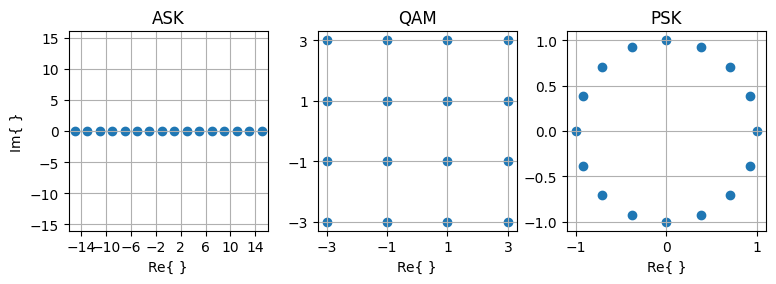

In [2]:
fig = plt.figure(figsize=(9,6))
plt.subplots_adjust(wspace=0.25)
ax = fig.add_subplot(131)
ax.scatter(np.real(ask_alphabet), np.imag(ask_alphabet), marker='o')
ax.set(adjustable='box', aspect='equal')
plt.xlabel('Re{ }')
plt.ylabel('Im{ }')
plt.title('ASK')
plt.grid(True)
plt.xlim((-M,M))
plt.ylim((-M,M))
plt.xticks(np.arange(2-M,M,M//4))

ax = fig.add_subplot(132)
ax.scatter(np.real(qam_alphabet), np.imag(qam_alphabet), marker='o')
ax.set(adjustable='box', aspect='equal')
plt.xlabel('Re{ }')
#plt.ylabel('Im{ }')
plt.title('QAM')
plt.grid(True)
plt.xticks(2*(np.arange(sqrtM)-sqrtM/2+1)-1)
plt.yticks(2*(np.arange(sqrtM)-sqrtM/2+1)-1)

ax = fig.add_subplot(133)
ax.scatter(np.real(psk_alphabet), np.imag(psk_alphabet), marker='o')
ax.set(adjustable='box', aspect='equal')
plt.xlabel('Re{ }')
#plt.ylabel('Im{ }')
plt.title('PSK')
plt.grid(True)


## Mapping

Um die Zuordnung der Bit-Tupel auf die Symbole genauer zu betrachten, zeigen die folgenden Graphiken die Signalräume mit den binären Darstellungen. Es ist zu erkennen, dass eine natürliche Dualzahlendarstellung gewählt wurde, so dass benachbarte Amplitudenwerte sich unter Umständen in allen 4 Bit unterscheiden. Dies führt zu einer hohen Bitfehlerwahrscheinlichkeit bei gestörter Übertragung.

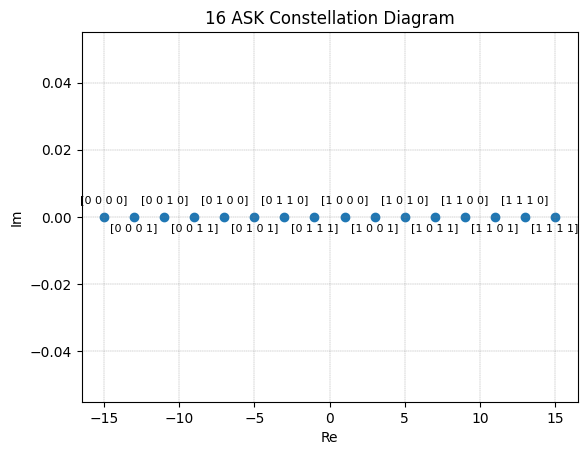

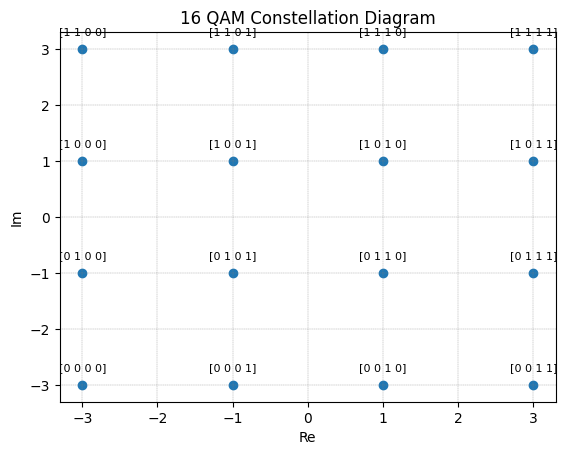

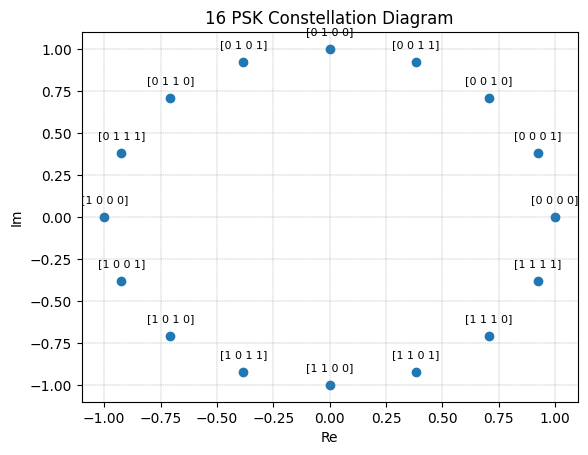

'PSK modulation, \n natural coding, \n 4 bits per symbol, \n 16 symbols'

In [3]:
askNat.plot_constellation
qamNat.plot_constellation
pskNat.plot_constellation

Aus diesem Grund wird in der Regel die Gray-Codierung verwendet, bei der sich Bitmuster benachbarter Amplitudenwerte nur in einem Bit unterscheiden. Dies minimiert die Bitfehlerwahrscheinlichkeit. 

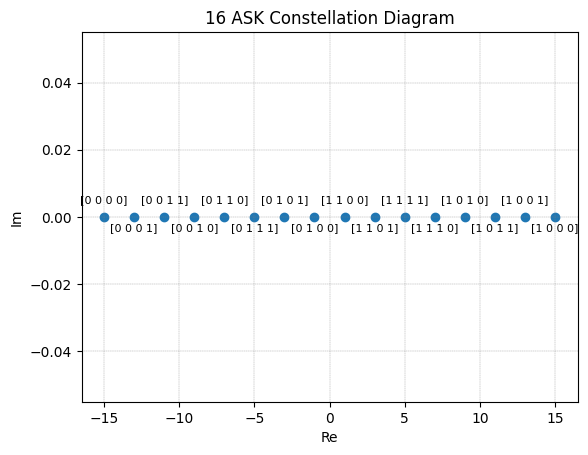

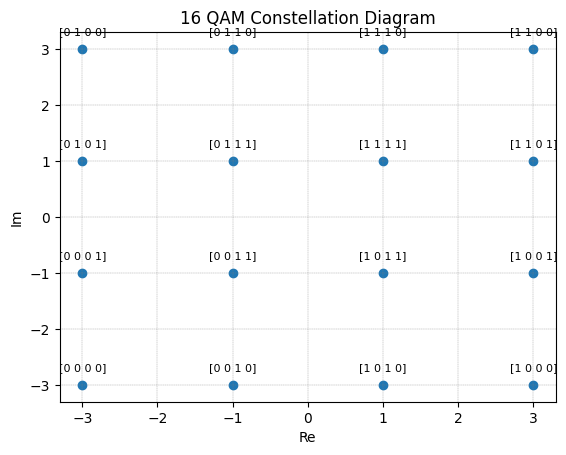

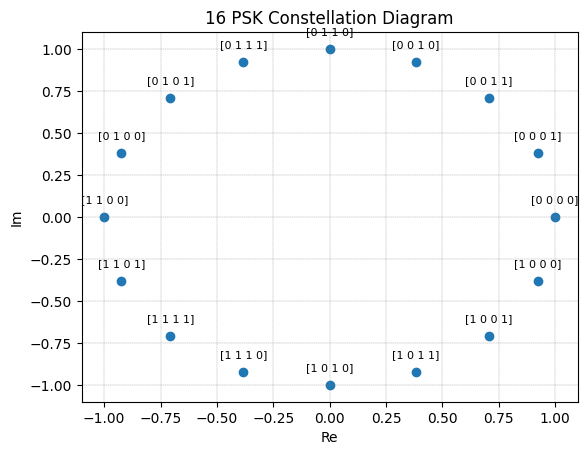

'PSK modulation, \n gray coding, \n 4 bits per symbol, \n 16 symbols'

In [4]:
# ASK alphabet
askGray = Modulation(m, coding_type='gray',modulation_type='ASK')
askGray.plot_constellation

# QAM alphabet
qamGray = Modulation(m, coding_type='gray',modulation_type='QAM')
qamGray.plot_constellation

# PSK alphabet
pskGray = Modulation(m, coding_type='gray',modulation_type='PSK')
pskGray.plot_constellation
